<a href="https://colab.research.google.com/github/MrSimple07/MachineLearning_Practice/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic PyTorch

Pytorch is a open source deep learning framework for python, developed by Facebook's AI research lab. It is a library for processing tensors.
- Tensor is multidimensional arrays
- Numpy=> arrays, pytorch => tensors
- It is popular for faster processing by GPU's. Especially for Deep learning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

Epoch [100/1000], Loss: 0.1796
Epoch [200/1000], Loss: 0.0960
Epoch [300/1000], Loss: 0.0740
Epoch [400/1000], Loss: 0.0577
Epoch [500/1000], Loss: 0.0455
Epoch [600/1000], Loss: 0.0363
Epoch [700/1000], Loss: 0.0293
Epoch [800/1000], Loss: 0.0241
Epoch [900/1000], Loss: 0.0201
Epoch [1000/1000], Loss: 0.0171


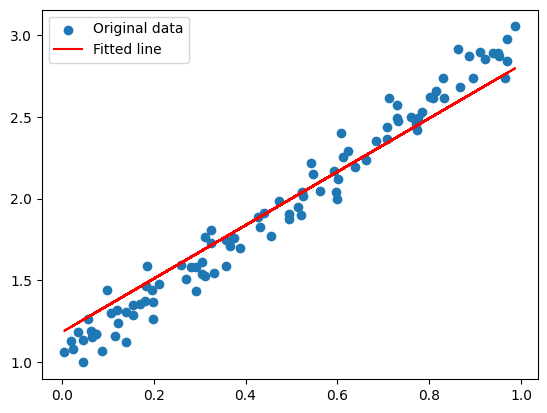

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)

# Step 2: Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Step 3: Define a simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

# Step 4: Instantiate the model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Step 5: Training the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Step 6: Plot the results
predicted = model(X_tensor).detach().numpy()

plt.scatter(X, y, label='Original data')
plt.plot(X, predicted, label='Fitted line', color='red')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from keras import layers, models, datasets
from keras.models import Sequential

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


model = Sequential([
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 5, validation_data = (test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2935 - accuracy: 0.9150 - val_loss: 0.1409 - val_accuracy: 0.9600
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1409 - accuracy: 0.9572 - val_loss: 0.0974 - val_accuracy: 0.9697
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1058 - accuracy: 0.9680 - val_loss: 0.0847 - val_accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0866 - accuracy: 0.9726 - val_loss: 0.0756 - val_accuracy: 0.9762
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.9764
0.9764000177383423


In [ ]:
from keras.layers import Conv2D

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.Flatten(),
    layers.Dense(64, activation  = 'relu'),
    layers.Dense(10, activation ='relu')
])

model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 5, batch_size = 64, validation_data = (test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/5
938/938 [==============================] - 53s 55ms/step - loss: 2.2285 - accuracy: 0.1508 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 2/5
938/938 [==============================] - 50s 53ms/step - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 3/5
938/938 [==============================] - 49s 52ms/step - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 4/5
938/938 [==============================] - 50s 53ms/step - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 2.3026 - accuracy: 0.0980
0.09799999743700027


In [7]:
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout, Activation
from keras.layers import GlobalMaxPooling2D

In [16]:
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True

In [11]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [17]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(48, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(80, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(GlobalMaxPooling2D())
model.add(Dropout(0.25))


model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.Adam(lr=0.0001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 48)        13872     
                                                                 
 activation_10 (Activation)  (None, 32, 32, 48)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 48)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 48)        0         
                                                      

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph2', histogram_freq=0, write_graph=True, write_images=True)

In [18]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True, callbacks=[tbCallBack])
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    '''
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
    '''
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test), callbacks=[tbCallBack])

Using real-time data augmentation.
Epoch 1/10


<ipython-input-18-c0aa93279554>:42: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train, y_train,


1562/1562 [==============================] - 304s 193ms/step - loss: 1.7147 - accuracy: 0.3613 - val_loss: 1.2841 - val_accuracy: 0.5252
Epoch 2/10
1562/1562 [==============================] - 311s 199ms/step - loss: 1.3535 - accuracy: 0.5079 - val_loss: 1.1259 - val_accuracy: 0.5956
Epoch 3/10
1562/1562 [==============================] - 306s 196ms/step - loss: 1.2149 - accuracy: 0.5640 - val_loss: 0.9904 - val_accuracy: 0.6407
Epoch 4/10
1562/1562 [==============================] - 298s 191ms/step - loss: 1.1415 - accuracy: 0.5919 - val_loss: 1.1239 - val_accuracy: 0.6060
Epoch 5/10
1562/1562 [==============================] - 309s 198ms/step - loss: 1.0951 - accuracy: 0.6098 - val_loss: 0.8507 - val_accuracy: 0.6979
Epoch 6/10
1562/1562 [==============================] - 310s 199ms/step - loss: 1.0490 - accuracy: 0.6303 - val_loss: 0.8917 - val_accuracy: 0.6822
Epoch 7/10
1562/1562 [==============================] - 300s 192ms/step - loss: 1.0282 - accuracy: 0.6377 - val_loss: 0.855

## Generative Adversial Network (GAN) for generating images of MNIST using Streamlit

In [4]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


In [5]:
import tensorflow as tf
import numpy as np
import streamlit as st
from keras.layers import Dense, LeakyReLU, BatchNormalization
from keras.layers import Reshape, Flatten, Conv2DTranspose, Input
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.optimizers import Adam

In [6]:
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train / 127.5 - 1.0
X_train = np.expand_dims(X_train, axis=3)

def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(128 * 7 * 7, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7, 7, 128)))
    model.add(BatchNormalization())
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', activation='tanh'))
    return model

# Build discriminator model
def build_discriminator(input_shape=(28, 28, 1)):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

latent_dim = 100
generator = build_generator(latent_dim)
z = Input(shape=(latent_dim,))
img = generator(z)
discriminator.trainable = False
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))


def train(epochs, batch_size=128, save_interval=50):
    for epoch in range(epochs):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(imgs, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

        if epoch % save_interval == 0:
            st.write(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")
            save_imgs(epoch)

In [8]:
def save_imgs(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    # Save the figure
    img_path = f"generated_images_epoch_{epoch}.png"
    plt.savefig(img_path)
    plt.close()
    st.image(img_path)

def main():
    st.title("MNIST GAN Generator")
    st.write("Generating handwritten digits using GAN")

    # Train the GAN
    train(epochs=100, batch_size=32, save_interval=1000)

if __name__ == "__main__":
    main()

2024-01-31 16:28:25.083 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


1/1 [==============================] - 0s 45ms/step


In [9]:
import streamlit as st

def main():
  st.title('MNIST GAN Generator')
  st.write('Mnist Generate')

  num_images = st.number_input('Enter the number: ')
  train(epochs = 100, batch_size = 32, save_interval = 1000)

if __name__ == "__main__":
    main()

1/1 [==============================] - 0s 54ms/step
